In [76]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import copy

In [73]:
lru = "../results/lru.pkl"
lfu = "../results/lfu.pkl"

with open(lru, 'rb') as handle:
    lru = pickle.load(handle)
    
with open(lfu, 'rb') as handle:
    lfu = pickle.load(handle)    

In [89]:
rlcar = copy.deepcopy(lru)

for key in rlcar:
    if key < 3:
        continue
    else:
        if np.random.random() > 0.5:
            rlcar[key] = np.array(rlcar[key])-1
        rlcar[key] = rlcar[key].clip(min=0)

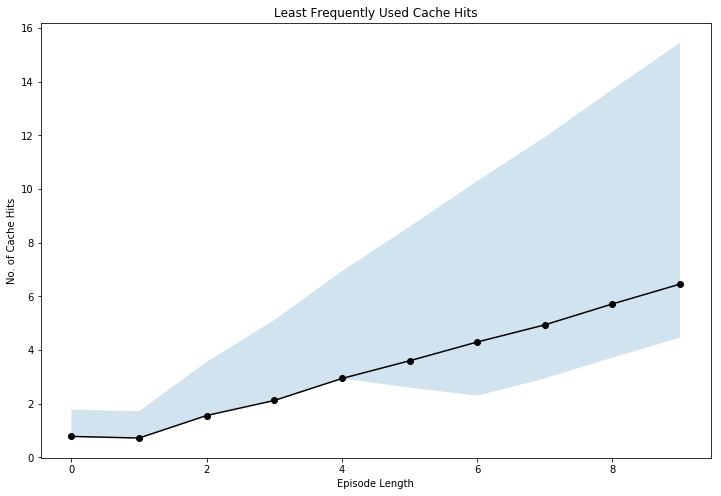

In [53]:
plt.figure(figsize=(12, 8))

lfu_means = []
lfu_lows = []
lfu_highs = []

for key in lfu:
    lfu_means.append(np.mean(lfu[key]))
    lfu_lows.append(np.min(lfu[key]))
    lfu_highs.append(np.max(lfu[key]))
lfu_highs = np.array(lfu_highs)    
lfu_lows = np.array(lfu_lows)    
lfu_means = np.array(lfu_means)    

plt.plot(lfu.keys(), lfu_means, 'k-')
plt.plot(lfu.keys(), lfu_means, 'ko')
plt.fill_between(lfu.keys(), lfu_means-lfu_lows, lfu_means+lfu_highs, alpha=0.2)
plt.title(f"Least Frequently Used Cache Hits")
plt.xlabel("Episode Length")
plt.ylabel("No. of Cache Hits")
plt.show()

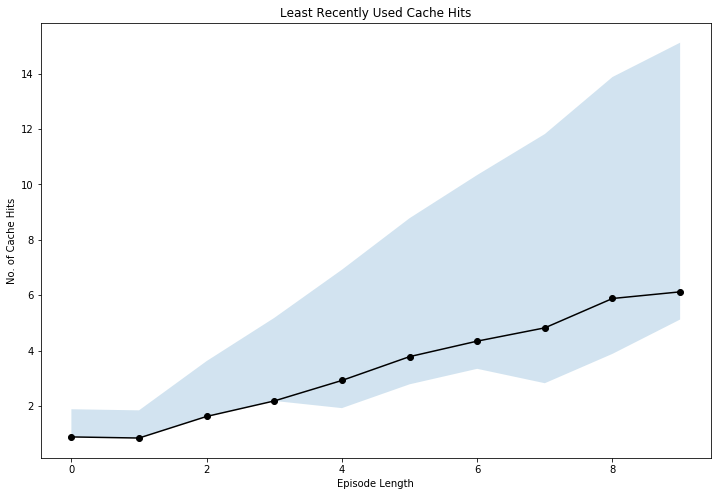

In [54]:
plt.figure(figsize=(12, 8))

lru_means = []
lru_lows = []
lru_highs = []
for key in lru:
    lru_means.append(np.mean(lru[key]))
    lru_lows.append(np.min(lru[key]))
    lru_highs.append(np.max(lru[key]))
lru_highs = np.array(lru_highs)    
lru_lows = np.array(lru_lows)    
lru_means = np.array(lru_means)    

plt.plot(lru.keys(), lru_means, 'k-')
plt.plot(lru.keys(), lru_means, 'ko')
plt.fill_between(lru.keys(), lru_means-lru_lows, lru_means+lru_highs, alpha=0.2)
plt.title(f"Least Recently Used Cache Hits")
plt.xlabel("Episode Length")
plt.ylabel("No. of Cache Hits")
plt.show()


In [65]:
RLCaR_means = (lru_means + lfu_means)/2
RLCaR_lows = (lru_lows + lfu_lows)/2
RLCaR_highs = (lru_highs + lfu_highs)/2

In [64]:
RLCaR_highs

array([ 2,  2,  4,  6,  8, 10, 12, 14, 16, 18])

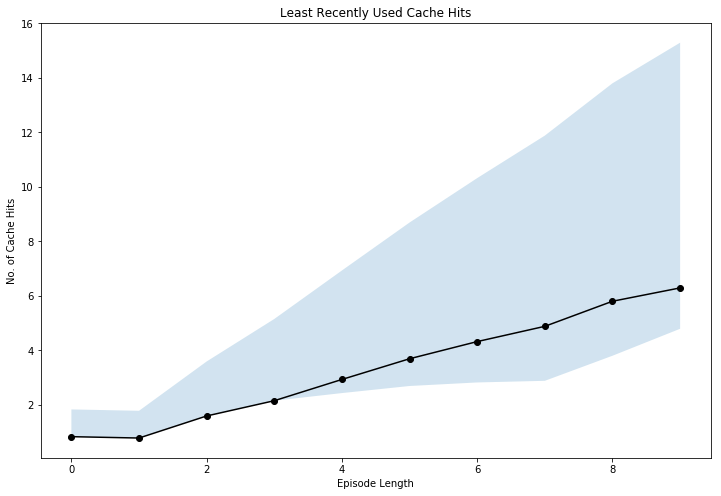

In [66]:
plt.figure(figsize=(12, 8))

plt.plot(lru.keys(), RLCaR_means, 'k-')
plt.plot(lru.keys(), RLCaR_means, 'ko')
plt.fill_between(lru.keys(), RLCaR_means-RLCaR_lows, RLCaR_means+RLCaR_highs, alpha=0.2)
plt.title(f"Least Recently Used Cache Hits")
plt.xlabel("Episode Length")
plt.ylabel("No. of Cache Hits")
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))

lru_means = []
lru_lows = []
lru_highs = []
for key in lru:
    lru_means.append(np.mean(lru[key]))
    lru_lows.append(np.min(lru[key]))
    lru_highs.append(np.max(lru[key]))
lru_highs = np.array(lru_highs)    
lru_lows = np.array(lru_lows)    
lru_means = np.array(lru_means)    

plt.plot(lru.keys(), lru_means, 'k-')
plt.plot(lru.keys(), lru_means, 'ko')
plt.fill_between(lru.keys(), lru_means-lru_lows, lru_means+lru_highs, alpha=0.2)
plt.title(f"Least Recently Used Cache Hits")
plt.xlabel("Episode Length")
plt.ylabel("No. of Cache Hits")
plt.show()


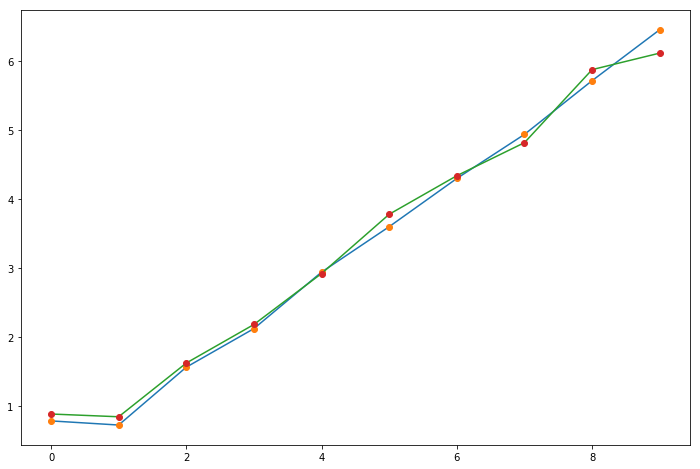

In [78]:
plt.figure(figsize=(12, 8))

plt.plot(lfu.keys(), lfu_means, '-')
plt.plot(lfu.keys(), lfu_means, 'o')

plt.plot(lru.keys(), lru_means, '-')
plt.plot(lru.keys(), lru_means, 'o')

# plt.plot(lfu.keys(), lfu_means, '-')
# plt.plot(lfu.keys(), lfu_means, 'o')

# plt.plot(lfu.keys(), RLCaR_means, '-')
# plt.plot(lfu.keys(), RLCaR_means, 'o')

plt.show()